# <span style="color:red">@@@@@@@@@@@@@Ayad@@@@@@@@@@@@@</span>

# <span style="color:chocolate">=== 1- Data ===</span>

In [1]:
from sklearn.datasets import load_files

data = load_files( r'D:\Projects\NLP\Text Clustering\bbc', 
                   encoding="utf-8", decode_error="replace", random_state = 33)

In [2]:
import pandas as pd

df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

In [3]:
df.head(7)

,text,label
0,Yukos owner sues Russia for $28bn\n\nThe major...,0
1,Dallaglio his own man to the end\n\nControvers...,3
2,US in EU tariff chaos trade row\n\nThe US has ...,0
3,Housewives lift Channel 4 ratings\n\nThe debut...,1
4,Leeds v Saracens (Fri)\n\nHeadingley\n\nFriday...,3
5,Britain boosted by Holmes double\n\nAthletics ...,3
6,Microsoft makes anti-piracy move\n\nMicrosoft ...,4


In [4]:
df.label.value_counts()

3    511
0    510
2    417
4    401
1    386
Name: label, dtype: int64

C:\Users\__Ayad__\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

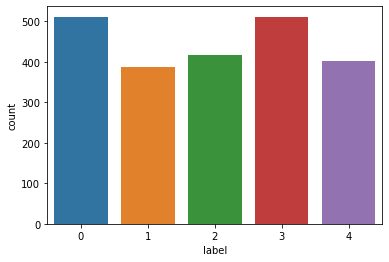

In [5]:
import seaborn as sns

sns.countplot(df.label)

# <span style="color:chocolate">=== 2- Feature Extraction ===</span>

##### There are two solutions to extract the features using TF_IDF strategy from the corpora:
#####    1- Transform the BOWs (count vectors) to TF_IDF matrix
#####    2- Build TF_IDF matrix directly

### <span style="color:green">1- Transform the BOWs (count vectors) to TF_IDF matrix</span>

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

Count_Vectorizer = CountVectorizer(stop_words="english")

In [7]:
Count_Vectorizer.fit(df.text.values)

document_term = Count_Vectorizer.transform(df.text.values)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_idf = TfidfTransformer()

In [9]:
tf_idf.fit(document_term)

TF_IDF_matrix = tf_idf.transform(document_term)

In [10]:
TF_IDF_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
TF_IDF_matrix = pd.DataFrame(TF_IDF_matrix.todense(),
                                    columns = Count_Vectorizer.get_feature_names())
TF_IDF_matrix

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.02243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <span style="color:green">2- Build TF_IDF matrix directly</span>

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")

In [13]:
vectorizer.fit(df.text.values)

tfidf_matrix = vectorizer.transform(df.text.values)

# <span style="color:chocolate">=== 3- Clustering ===</span>

In [14]:
from sklearn.cluster import MiniBatchKMeans

MBKmeans = MiniBatchKMeans(n_clusters = 5, random_state = 33)

In [15]:
MBKmeans.fit(tfidf_matrix)

X = MBKmeans.predict(tfidf_matrix)
X

array([4, 1, 2, ..., 2, 1, 1])

In [16]:
MBKmeans.labels_

array([4, 1, 2, ..., 2, 1, 1])

In [17]:
MBKmeans.cluster_centers_

array([[1.35475463e-04, 9.93256054e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.80873366e-05, 4.55876199e-03, 0.00000000e+00, ...,
        0.00000000e+00, 3.05323684e-04, 1.88748641e-04],
       [2.03836633e-04, 1.32080479e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.42296842e-05, 9.22644872e-03, 7.01092545e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.35306026e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [18]:
MBKmeans.inertia_

2132.7325030407524

# <span style="color:chocolate">=== 4- PCA ===</span>

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 33)

In [20]:
reduced_tfidf_matrix = pca.fit_transform(tfidf_matrix.todense())

In [21]:
reduced_cluster_centers = pca.transform(MBKmeans.cluster_centers_)
reduced_cluster_centers

array([[-0.03061269,  0.11259232],
       [-0.06418224, -0.07364352],
       [-0.00818758,  0.06804513],
       [ 0.14558919, -0.02607401],
       [ 0.13769417,  0.02378474]])

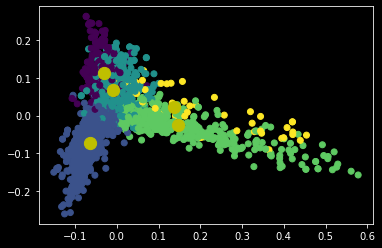

In [22]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.scatter(reduced_tfidf_matrix[:,0], reduced_tfidf_matrix[:,1], c=MBKmeans.predict(tfidf_matrix))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, c='y')

In [23]:
from sklearn.metrics import homogeneity_score

homogeneity_score(df.label, MBKmeans.predict(tfidf_matrix))

0.6460335957689028

# <span style="color:red">@@@@@@@@@@@@@Ayad@@@@@@@@@@@@@</span>